# TP 4 : Générateurs de nombres pseudo-aléatoires

## 1. Générateurs à congruence linéaire

- Ecrire une classe `GenerateurCL` pour créer et utiliser des générateurs à congruence linéaire. 
    - La méthode `__init__` de cette classe prendra en paramètres les valeurs de $a$, $c$ et $m$. Par défaut, la valeur initiale (la graine) du générateur sera produite en utilisant la fonction `time` du module `time`.
    - Cette classe contiendra par ailleurs les méthodes suivantes :
        - `random` qui applique la fontion $\varphi$ à la valeur courante et renvoie cette nouvelle valeur ;
        - `seed` qui prend en paramètre un entier et réinitialise le générateur avec cet entier comme graine ;
        - `uniform` qui prend en paramètres deux nombres flottants `vmin` et `vmax` et renvoie un nombre aléatoire flottant suivant une loi uniforme sur `[vmin,vmax[` ;
        - `randint` qui prend en paramètres deux entiers `imin` et `imax` et renvoie un nombre aléatoire entier suivant une loi uniforme sur `{imin,...,imax}`.

In [1]:
from time import time
from math import floor

class GenerateurCL:
    
    def __init__(self, a: int, c: int, m: int):
        self.a = a
        self.c = c
        self.m = m
        self.current = int(time()) % m
        
    def random(self):
        self.current = (self.a * self.current + self.c) % self.m
        return self.current
    
    def seed(self, seed: int):
        self.current = seed
    
    def uniform(self, vmin: float, vmax: float) -> float:
        f = (self.random() + .5) / self.m
        return vmin + f * (vmax - vmin)
    
    def randint(self, imin: int, imax: int) -> int:
        return floor(self.uniform(imin, imax))

- Créer un générateur de paramètres $(5,1,16)$ et afficher les 20 premiers nombres pseudo-aléatoires produits par ce générateur.

In [2]:
gen = GenerateurCL(5, 1, 16)

for _ in range(20):
    print(gen.random())

3
0
1
6
15
12
13
2
11
8
9
14
7
4
5
10
3
0
1
6


- Fixer la graine du générateur à 10. Afficher les 20 premiers nombres pseudo-aléatoires produits par ce générateur avec cette graine.

In [3]:
gen.seed(10)

for _ in range(20):
    print(gen.random())

3
0
1
6
15
12
13
2
11
8
9
14
7
4
5
10
3
0
1
6


- Tester les méthodes `uniform` et `randint`.

In [4]:
print(gen.uniform(1.1, 1.2))

print(gen.randint(1, 10))

1.196875
8


## 2. Tests de quelques générateurs à congruence linéaire

- Créer les générateurs à congruence linéaire de paramètres suivants :
    - $(9,5,2^{31})$
    - $(11,5,2^{31})$
    - $(1664523,1013904223,2^{31})$
    - $(1664525,1013904223,2^{31})$
    - $(16807,0,2^{31}-1)$ [*Ce générateur est appelé Standard Minimal*]

In [5]:
gen1 = GenerateurCL(9, 5, 2 ** 31)
gen2 = GenerateurCL(11, 5, 2 ** 31)
gen3 = GenerateurCL(1664523, 1013904223, 2 ** 31)
gen4 = GenerateurCL(1664525, 1013904223, 2 ** 31)
gen5 = GenerateurCL(16807, 0, 2 ** 31 - 1)

Soit $n$ un entier fixé et $m$ un multiple de $n$. Si l'on tire aléatoirement un nombre $x$ dans $\{0,\ldots,m-1\}$ suivant une loi uniforme, il y a autant de chance que $x \equiv 0 \mod n$ ou que $x \equiv 1 \mod n$ ou que $x \equiv 2 \mod n$, etc. On aimerait donc que les nombres pseudo-aléatoires produits par nos générateurs vérifient aussi cette propriété. Remarque : si $m$ est grand devant $n$, même si $m$ n'est pas un multiple de $n$, on peut considérer qu'il y a équiprobabilité des congruences.

- Ecrire une fonction `test_modulo` qui tire un échantillon de nombres pseudo-aléatoires produits par un générateur, calcule les congruences modulo $n$ (où $n$ est donné) et affiche la répartition des congruences sous forme d'histogramme. Cette fonction prendra comme paramètres : `rd`, le générateur de nombres pseudo-aléatoires, `nsample`, la taille de l'échantillon, et `n`, le nombre modulo pour lequel on calcule les congruences.

In [6]:
import matplotlib.pyplot as plt

def test_modulo(rd: GenerateurCL, nsample: int, n: int):
    """
    Établir le graphique de la fréquence des modulos.
    :param rd: Générateur de nombres pseudo-aléatoires.
    :param nsample: Taille de l'échantillon
    :param n: Modulo pour lequel on calcule les congruences.
    """
    plt.hist([rd.random() % n for _ in range(nsample)], bins=n)
    plt.show()

- Tester les différents générateurs pour des congruences modulo 4 avec des échantillons de 4 000 nombres.

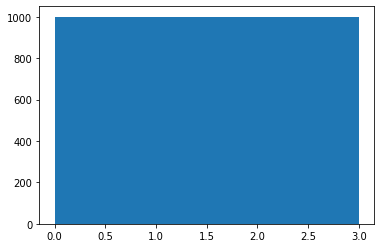

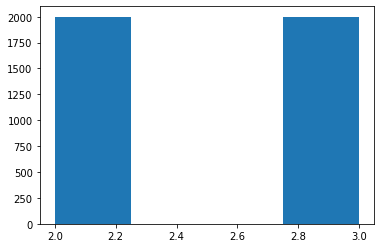

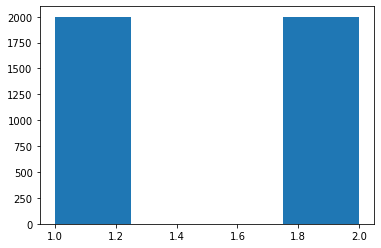

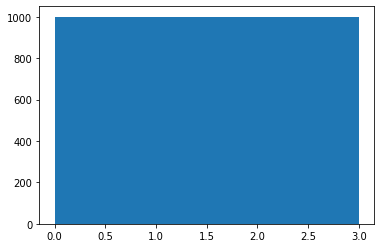

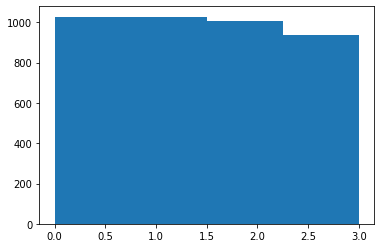

In [7]:
test_modulo(gen1, 4000, 4)
test_modulo(gen2, 4000, 4)
test_modulo(gen3, 4000, 4)
test_modulo(gen4, 4000, 4)
test_modulo(gen5, 4000, 4)

- Tester les différents générateurs pour des congruences modulo 10 avec des échantillons de 10 000 nombres.

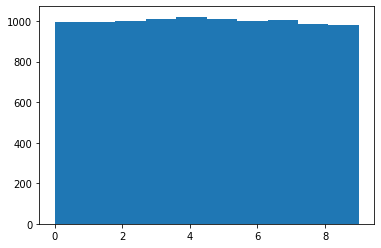

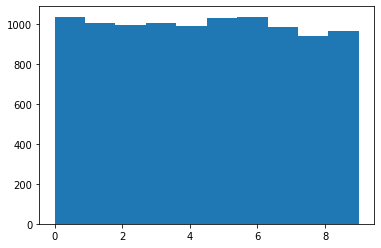

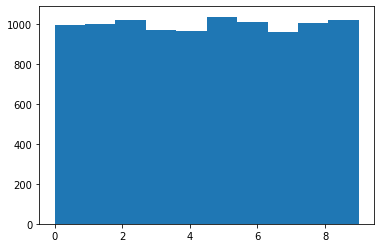

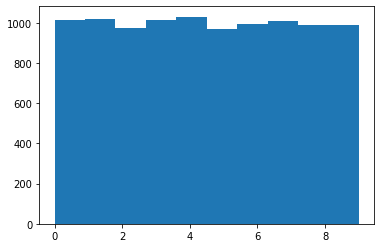

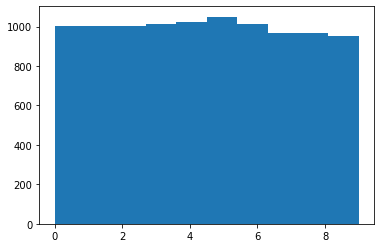

In [8]:
test_modulo(gen1, 10000, 10)
test_modulo(gen2, 10000, 10)
test_modulo(gen3, 10000, 10)
test_modulo(gen4, 10000, 10)
test_modulo(gen5, 10000, 10)

- Commenter les résultats de ces tests ? Sont-ils cohérents avec les résultats théoriques démontrés en TD ?

*Oui les résultats sont cohérents. Les histogrammes indiquent que la fréquence des modulos est presque constante, ce qui indique que chaque modulo a presque la même probabilité que les autres de sortir.*

Si l'on tire aléatoirement trois nombres $x_1,x_2,x_3$ de façon indépendante, suivant une même loi, il y autant de chance que $x_1<x_2<x_3$ ou que $x_1<x_3<x_2$ ou que $x_2<x_1<x_3$, etc. On aimerait donc que les nombres pseudo-aléatoires produits par nos générateurs vérifient aussi cette propriété.

- Ecrire une fonction `test_order` qui tire un échantillon de triplets de nombres pseudo-aléatoires produits par un générateur, détermine l'ordre de ces triplets et affiche la répartition des ordres trouvés dans l'échantillon sous forme d'histogramme. Cette fonction prendra comme paramètres : `rd`, le générateur de nombres pseudo-aléatoires, et `nsample`, la taille de l'échantillon.

In [9]:
def test_order(rd: GenerateurCL, nsample: int):
    sample = [0] * 6
    for _ in range(nsample):
        x1, x2, x3 = rd.random(), rd.random(), rd.random()
        if x1 < x2 < x3:
            sample[0] += 1
        elif x1 < x3 < x2:
            sample[1] += 1
        elif x2 < x1 < x3:
            sample[2] += 1
        elif x2 < x3 < x1:
            sample[3] += 1
        elif x3 < x1 < x2:
            sample[4] += 1
        elif x3 < x2 < x1:
            sample[5] += 1
        else:
            print("else")
            
    plt.figure(figsize=(8,4))
    plt.bar(range(6), sample)
    plt.xticks(range(6), ('$x_1<x_2<x_3$', '$x_1<x_3<x_2$', '$x_2<x_1<x_3$', '$x_2<x_3<x_1$', '$x_3<x_1<x_2$', '$x_3<x_2<x_1$'))
    plt.show()

- Tester avec un échantillon de 60 000 triplets de nombres

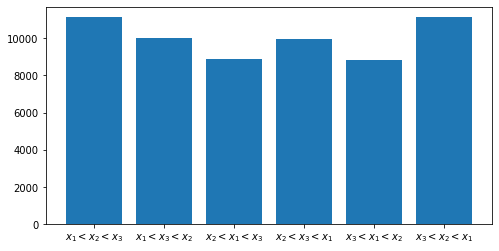

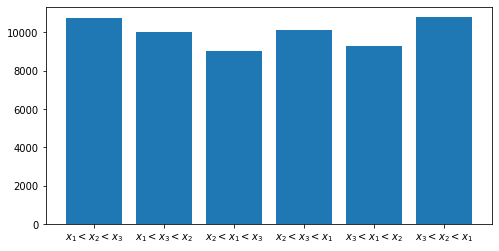

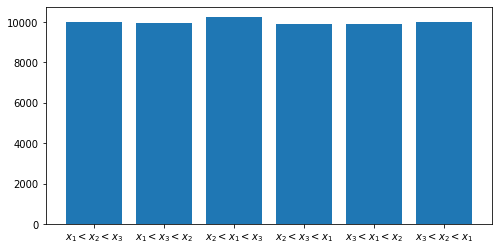

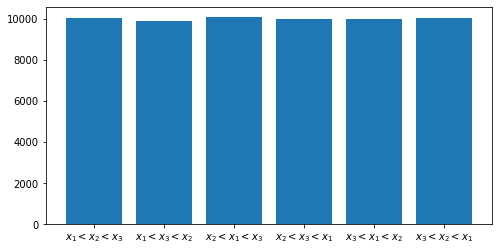

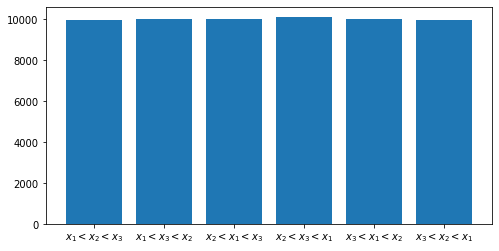

In [10]:
test_order(gen1, 60000)
test_order(gen2, 60000)
test_order(gen3, 60000)
test_order(gen4, 60000)
test_order(gen5, 60000)

- Commenter les résultats de ces tests.

*Les deux premiers générateurs (ceux avec des petites valeurs pour $a$ et $c$) ont des résultats moins satisfaisants que les 3 autres. Les générateurs avec de plus grandes valeurs offrent plus de stabilité sur l'ordre des nombres sortants.*

## 3. Générateur de Von Neumann

Un des premiers générateur de nombre pseudo-aléatoires a été proposé par le mathématicien John Von Neumann dans les années 40. Il génère des entiers compris entre 0 et 9999 ($\text{valeurMax}=9999$) de la façon suivante : si le dernier entier généré est $x$ (avec $x$ qui vaut la `graine` au début), alors on calcule $x^2$, on rajoute éventuellement des $0$ en tête pour avoir 8 chiffres en base 10 et on prend les 4 chiffres du milieu comme nouveau nombre "aléatoire".

Par exemple si la `graine` est 1230, la première fois qu'on demande un nombre au générateur cela donne $5129$ car
$$1230^2 = 01\underline{5129}00 \rightarrow 5129.$$
Si on demande un nouveau nombre on aura $3066$ car
$$5129^2 = 26\underline{3066}41 \rightarrow 3066.$$

- Ecrire une classe `VonNeumann` sur le modèle de la classe écrite pour les générateurs à congruence linéaire.

In [11]:
class VonNeumann:
    
    def __init__(self, seed):
        self.current = seed
        
    def random(self):
        square = str(self.current ** 2)
        
        while len(square) < 8:
            square = "0" + square
        
        self.current = int(square[2:6])
        return self.current

- Fixer la graine à 1230. Afficher les 20 premiers nombres produits par le générateur de VonNeumann. Que remarquez-vous ? Essayez avec d'autres graines.

In [12]:
von = VonNeumann(1230)

for _ in range(20):
    print(von.random(), end=" ")

5129 3066 4003 240 576 3317 24 5 0 0 0 0 0 0 0 0 0 0 0 0 

*On remarque qu'à partir du 9e tirage, on reste bloqué sur 0.*

In [13]:
von = VonNeumann(6239)

for _ in range(20):
    print(von.random(), end=" ")

9251 5810 7561 1687 8459 5546 7581 4715 2312 3453 9232 2298 2808 8848 2871 2426 8854 3933 4684 9398 

*Avec la graine 6239, on obtient un flux de nombres pseudo-aléatoires distincts.*

Un des moyens de tester si un générateur de nombres pseudo-aléatoire n'est pas trop mauvais, c'est de calculer le nombre d'itération avant qu'il ne "boucle", c'est-à-dire qu'il retombe sur un nombre déjà calculé, puisqu'à partir de là il va boucler et redonner les mêmes valeurs.

- Ecrire une fonction `nombreValeursVN(seed)` qui calcule au bout de combien d'itérations un générateur de Von Neumann de graine `seed` retombe sur une valeur déjà calculée. L'utiliser pour différentes valeurs de graines.

In [14]:
def nombreValeursVN(seed: int):
    """
    Calculer le nombre de tirage avant que le générateur de Von Neumann boucle.
    :param seed: Graine de départ.
    """
    von = VonNeumann(seed)
    rd, i = von.random(), 0
    values = set()
    while rd not in values:
        values.add(rd)
        rd = von.random()
        i += 1
    return i

- Quelle est la graine qui maximise le nombre de valeurs différentes générées ?

In [15]:
maximum, max_seed = 0, 0
for seed in range(10000):
    result = nombreValeursVN(seed)
    if result > maximum:
        maximum = result
        max_seed = seed
        
print("La graine {} ne boucle qu'après {} tirages.".format(max_seed, maximum))

La graine 6239 ne boucle qu'après 110 tirages.


- Le générateur de Von Neumann vous semble-t-il être un bon générateur ?

*Le générateur de Von Neumann a le mérite d'être simple à comprendre mais ne permet pas de générer un grand nombre de valeurs pseudo-aléatoires sans boucler.*